In [2]:
!pip install pycaret


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 69.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 17.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 69.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 77.3 MB/s 

In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from pycaret.clustering import setup, create_model, assign_model
import pandas as pd
from sklearn.metrics import silhouette_score

In [3]:
# Generate a 2D dataset with 300-400 points
X, _ = make_blobs(n_samples=350, centers=4, n_features=2, random_state=42)
df = pd.DataFrame(X, columns=['Feature1', 'Feature2'])


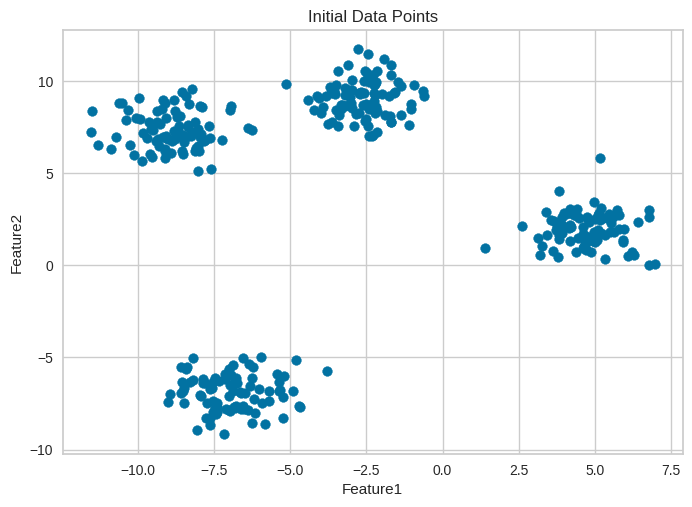

In [4]:
# Plot initial data points
plt.scatter(df['Feature1'], df['Feature2'])
plt.title("Initial Data Points")
plt.xlabel("Feature1")
plt.ylabel("Feature2")
plt.show()


In [6]:
# Setting up DBSCAN using PyCaret
cluster_setup = setup(df, normalize = True, session_id=123)


,Description,Value
0,Session id,123
1,Original data shape,"(350, 2)"
2,Transformed data shape,"(350, 2)"
3,Numeric features,2
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore


In [7]:
# Create models with different parameters
models = []
params = [(0.3, 5), (0.5, 5), (0.3, 10), (0.5, 10)]
for eps, samples in params:
    model = create_model('dbscan', eps=eps, min_samples=samples)
    models.append(model)


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7238,2882.0483,0.3074,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7425,1261.2131,0.3692,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7238,2882.0483,0.3074,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.7425,1261.2131,0.3692,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

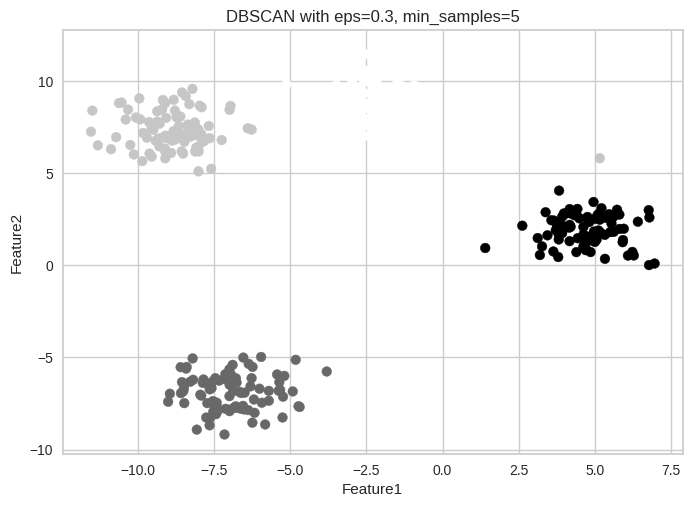

Silhouette Score for eps=0.3, min_samples=5: 0.7834038036550935


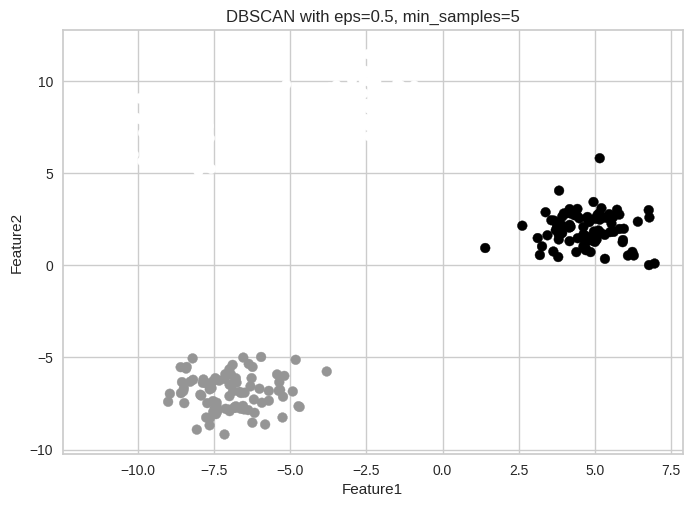

Silhouette Score for eps=0.5, min_samples=5: 0.7566827130164836


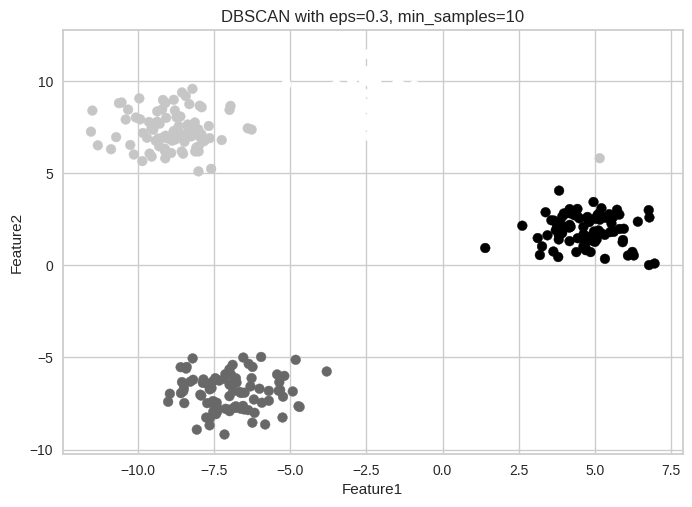

Silhouette Score for eps=0.3, min_samples=10: 0.7834038036550935


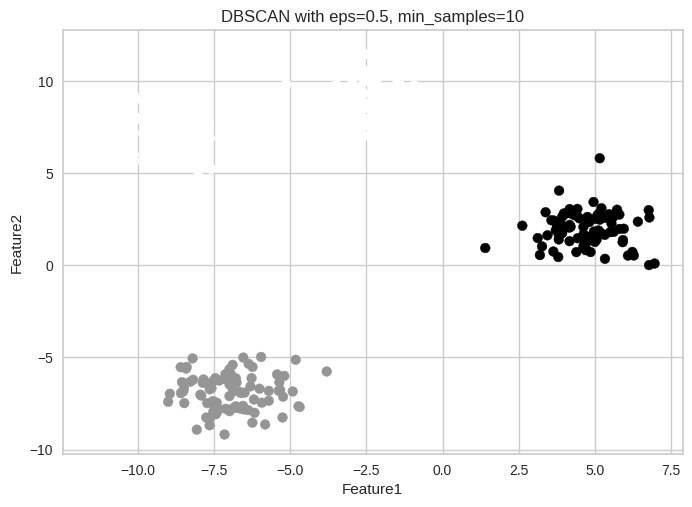

Silhouette Score for eps=0.5, min_samples=10: 0.7566827130164836


In [10]:
# Plotting and analyzing the results
for model in models:
    assigned_df = assign_model(model)
    # Convert cluster labels to numerical format if necessary
    if assigned_df['Cluster'].dtype == 'object':
        # If the labels are strings like 'Cluster 0', 'Cluster 1', etc.
        df['Cluster'] = assigned_df['Cluster'].str.extract('(\d+)').astype(int)
    else:
        # If the labels are already numerical
        df['Cluster'] = assigned_df['Cluster']

    plt.figure()
    plt.scatter(df['Feature1'], df['Feature2'], c=df['Cluster'])
    plt.title(f"DBSCAN with eps={model.eps}, min_samples={model.min_samples}")
    plt.xlabel("Feature1")
    plt.ylabel("Feature2")
    plt.show()

    # Silhouette score
    # Filter out noise points (-1 label) before calculating the score
    filtered_df = df[df['Cluster'] != -1]
    score = silhouette_score(filtered_df[['Feature1', 'Feature2']], filtered_df['Cluster'])
    print(f"Silhouette Score for eps={model.eps}, min_samples={model.min_samples}: {score}")
